In [106]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [108]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [109]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-110-658a57c1fb66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


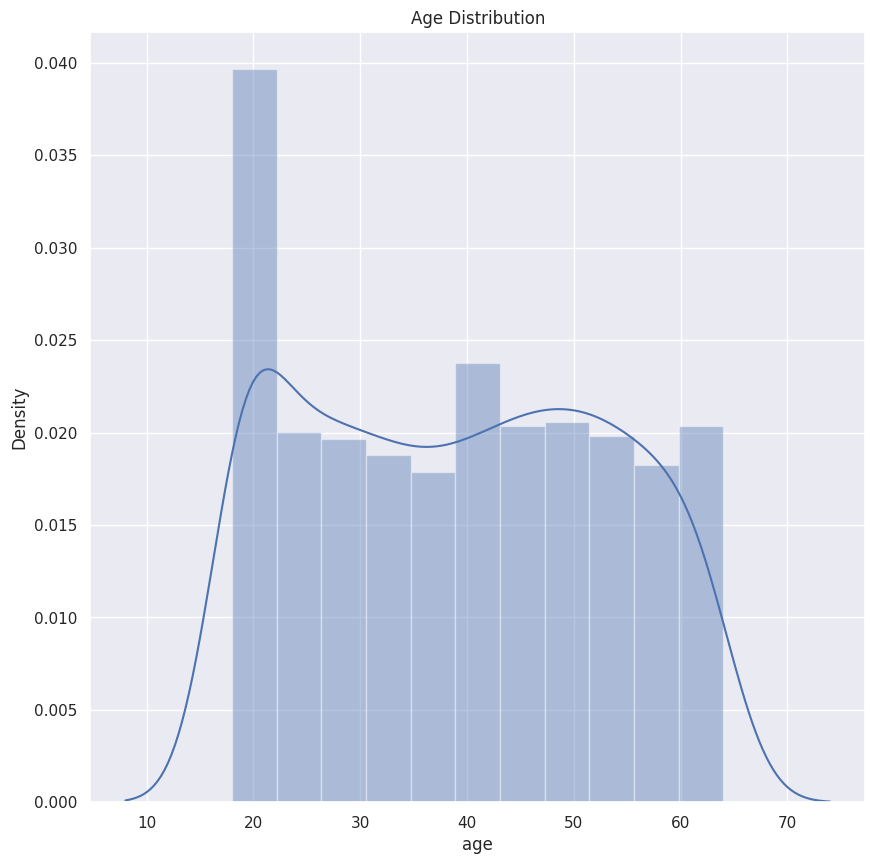

In [110]:
sns.set()
plt.figure(figsize=(10,10))
plt.title('Age Distribution')
sns.distplot(df['age'])
plt.show()

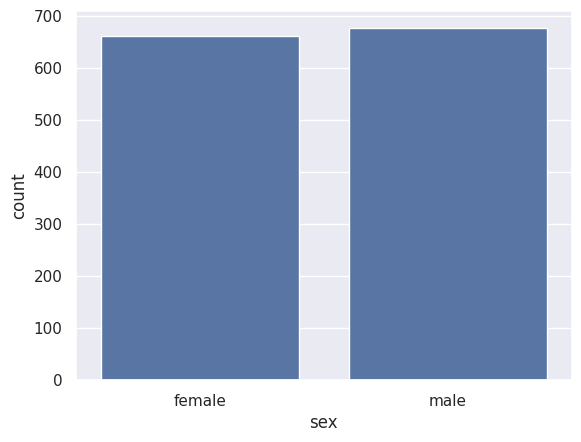

In [111]:
# checking issuance cost vs age
sns.countplot(x=df['sex'] ,data = df)

plt.show()

<ipython-input-112-1d7d3c51c0e0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['children'])


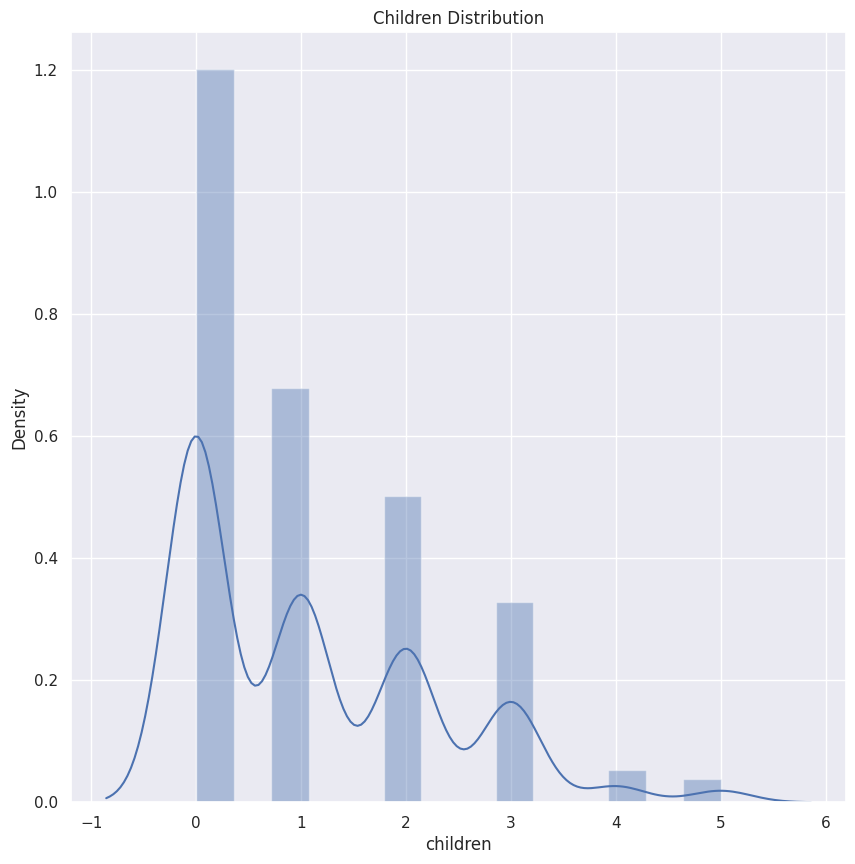

In [112]:

plt.figure(figsize=(10,10))
plt.title('Children Distribution')
sns.distplot(df['children'])
plt.show()

<ipython-input-113-8275686e4266>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


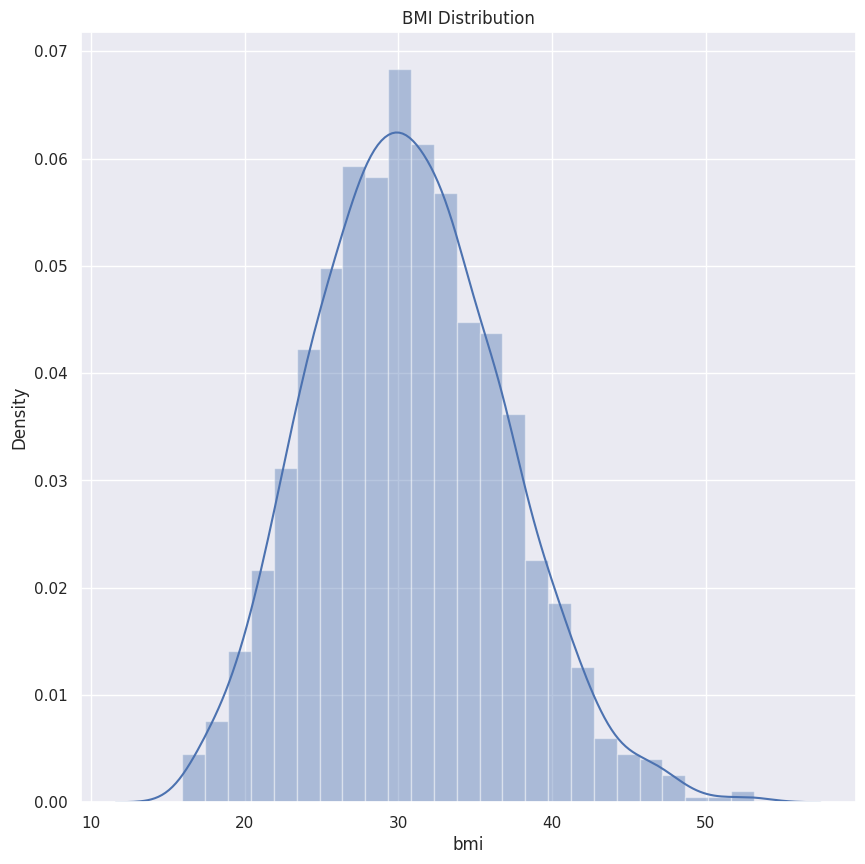

In [113]:
sns.set()
plt.figure(figsize=(10,10))
plt.title('BMI Distribution')
sns.distplot(df['bmi'])
plt.show()

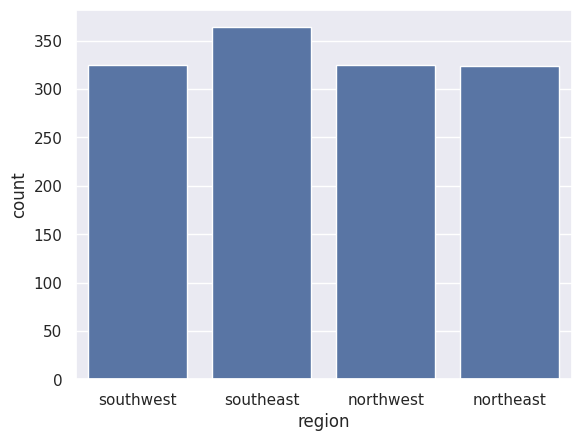

In [114]:
sns.countplot(x=df['region'] ,data = df)

plt.show()

<ipython-input-115-e5e3ba01d077>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


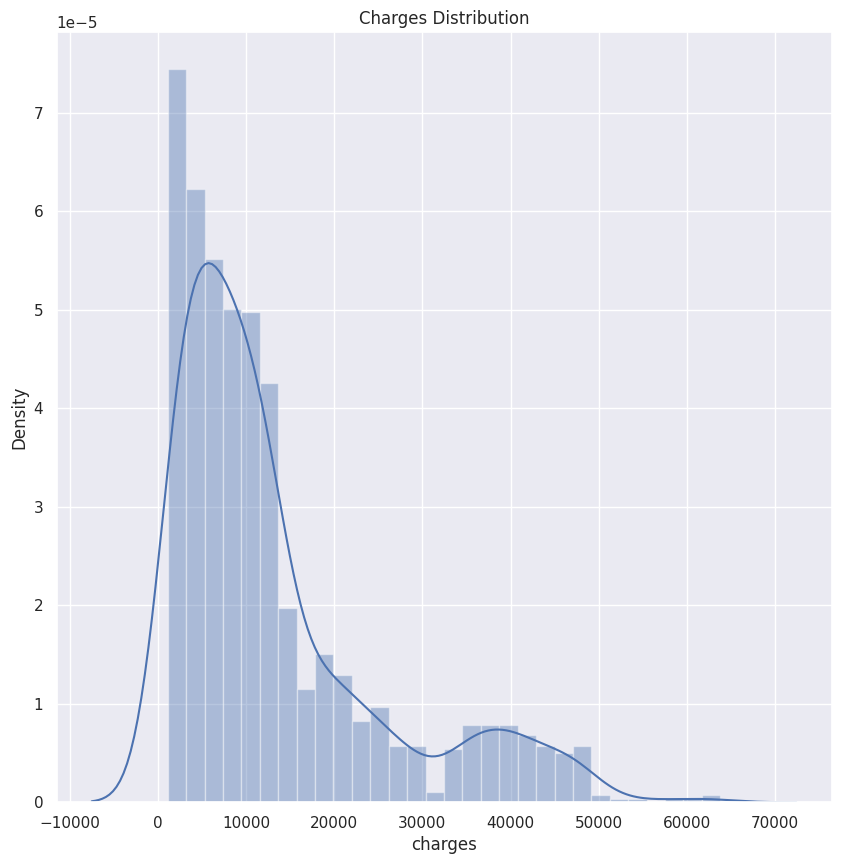

In [115]:
plt.figure(figsize=(10,10))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [116]:
df = df.replace({
    'sex': {'male': 0, 'female': 1},
    'region': {'northeast': 0, 'southeast': 1, 'northwest': 2, 'southwest': 3},
    'smoker': {'yes': 0, 'no': 1}
})


In [117]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [118]:
x = df.drop('charges',axis =1 )
y = df['charges']

In [119]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,3
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2


In [120]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [121]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()


In [122]:
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state=2, test_size = 0.2)

In [123]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [124]:
lr.fit(x_train,y_train)


LinearRegression()

In [125]:
lr_train_pred = lr.predict(x_train)

In [126]:
# checking on train data
from sklearn.metrics import r2_score
r2 = r2_score(y_train , lr_train_pred)
print(r2)

0.751618558520502


In [127]:
# checking on test data
lr.fit(x_test,y_test)

LinearRegression()

In [128]:
lr_test_pred = lr.predict(x_test)

In [129]:
# checking on train data
from sklearn.metrics import r2_score
r2_test = r2_score(y_test , lr_test_pred)
print(r2)

0.751618558520502


In [130]:
# checking with random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()


In [131]:
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [132]:
rfr_train_pred = rfr.predict(x_train)

In [133]:
# checking on train data
from sklearn.metrics import r2_score
r2_train_rfr = r2_score(y_train , rfr_train_pred)
print(r2_train_rfr)

0.9767265971146284


In [134]:
# checking on test data
rfr.fit(x_test,y_test)

RandomForestRegressor()

In [135]:
rfr_test_pred = rfr.predict(x_test)

In [136]:
# checking on train data

r2_rfr_test = r2_score(y_test , rfr_test_pred)
print(r2_rfr_test)

0.9737839489033767


TypeError: 'Series' object is not callable

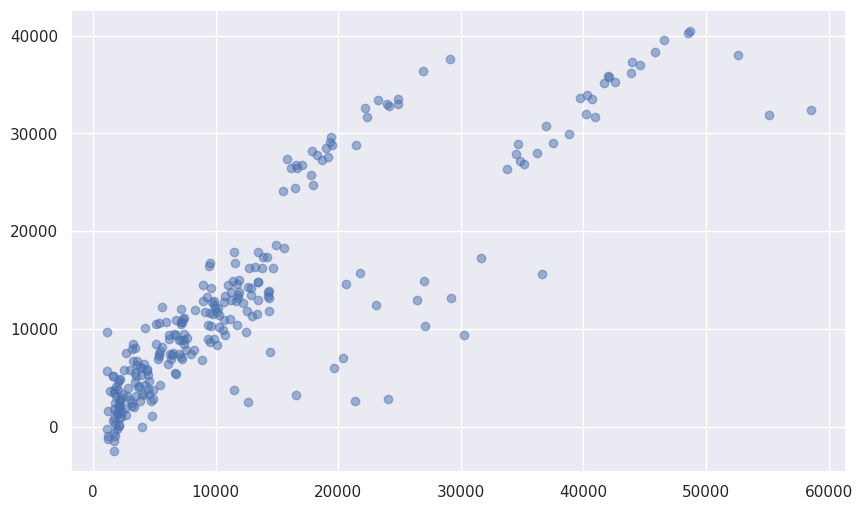

In [138]:

# Linear Regression Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_test_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')



TypeError: 'Series' object is not callable

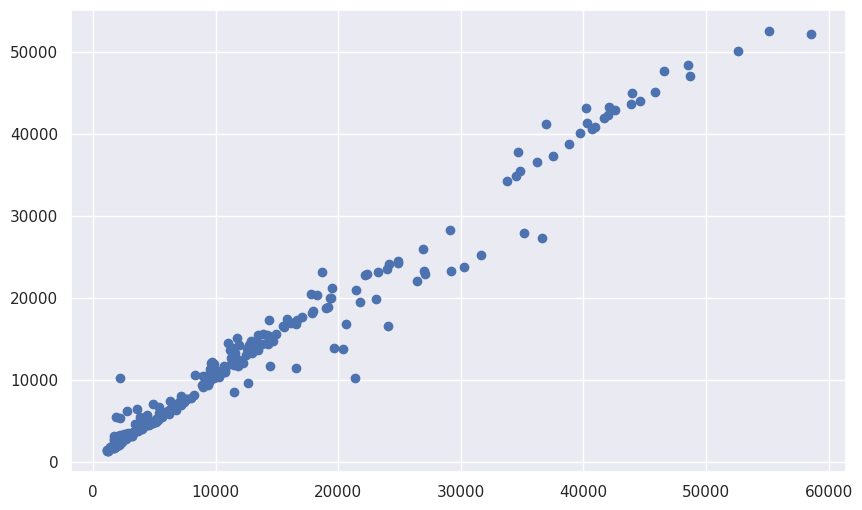

In [139]:
# Random Forest Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfr_test_pred)
plt.ylabel("Predicted Charges (Random Forest)")
plt.title("Random Forest: Actual vs. Predicted Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
